### Load and Explore the Dataset

In [4]:
! pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.5/390.5 kB 11.9 MB/s eta 0:00:00


In [6]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_path = '/Users/ireneliu/Desktop/Audio_Speech_Actors_01-24'

# Initialize an empty list to store data
data = []

# Loop through each file in the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            # Get the full file path
            file_path = os.path.join(root, file)
            
            # Load the audio file
            audio, sample_rate = librosa.load(file_path, sr=None)
            parts = file.split('-')
            emotion = int(parts[2])
            
            # Map emotion index to emotion label
            emotion_map = {
                1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 
                6: 'fearful', 7: 'disgust', 8: 'surprised'
            }
            emotion_label = emotion_map.get(emotion, 'unknown')
            
            # Append data to the list
            data.append([file_path, emotion_label, audio, sample_rate])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['File Path', 'Emotion', 'Audio', 'Sample Rate'])

# Display the first few rows
print(df.head())

                                           File Path  Emotion  \
0  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...    angry   
1  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  fearful   
2  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  fearful   
3  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...    angry   
4  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  disgust   

                                               Audio  Sample Rate  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        48000  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        48000  
2  [3.0517578e-05, 6.1035156e-05, 0.0, 3.0517578e...        48000  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        48000  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...        48000  


### Data Analysis

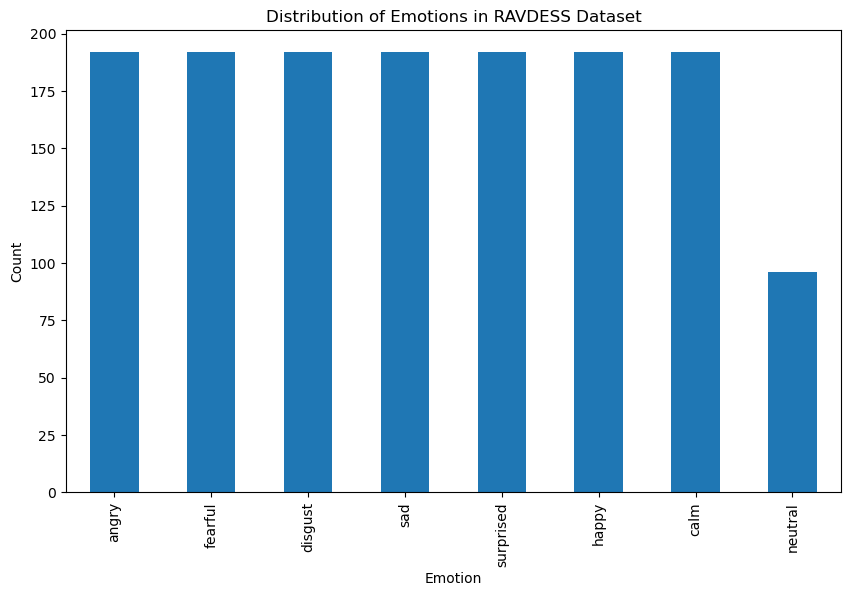

In [8]:
# Visualize the distribution of emotions
emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [10]:
def extract_features(audio, sample_rate):
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Apply feature extraction to all audio samples
df['Features'] = df.apply(lambda row: extract_features(row['Audio'], row['Sample Rate']), axis=1)

# Display the first few rows with extracted features
print(df[['File Path', 'Emotion', 'Features']].head())

                                           File Path  Emotion  \
0  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...    angry   
1  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  fearful   
2  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  fearful   
3  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...    angry   
4  /Users/ireneliu/Desktop/Audio_Speech_Actors_01...  disgust   

                                            Features  
0  [-563.28656, 49.648838, -6.105738, 10.458235, ...  
1  [-582.41504, 53.82776, -6.217736, 7.7031937, -...  
2  [-418.49988, 39.591274, -25.592108, -2.834798,...  
3  [-470.2107, 48.589825, -8.505513, 5.7287583, -...  
4  [-650.4923, 64.39037, 0.82921916, 11.523897, -...  


In [14]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# Train the model with class weights
model = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.4652777777777778
Classification Report:
              precision    recall  f1-score   support

       angry       0.57      0.75      0.65        36
        calm       0.50      0.41      0.45        44
     disgust       0.48      0.38      0.43        39
     fearful       0.48      0.44      0.46        34
       happy       0.50      0.46      0.48        41
     neutral       0.23      0.40      0.29        20
         sad       0.43      0.35      0.39        34
   surprised       0.48      0.50      0.49        40

    accuracy                           0.47       288
   macro avg       0.46      0.46      0.45       288
weighted avg       0.47      0.47      0.46       288



In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import librosa

def extract_features(audio, sample_rate):
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    
    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_mean = np.mean(chroma.T, axis=0)
    
    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)
    
    # Combine features
    features = np.hstack([mfccs_mean, chroma_mean, spectral_contrast_mean])
    
    return features

# Apply feature extraction to all audio samples
df['Features'] = df.apply(lambda row: extract_features(row['Audio'], row['Sample Rate']), axis=1)

# Extract features and labels
X = np.array(df['Features'].tolist())
y = df['Emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a more advanced model (Random Forest as an example)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6111111111111112
Classification Report:
              precision    recall  f1-score   support

       angry       0.81      0.72      0.76        36
        calm       0.57      0.80      0.67        44
     disgust       0.51      0.46      0.49        39
     fearful       0.64      0.53      0.58        34
       happy       0.62      0.61      0.62        41
     neutral       0.44      0.35      0.39        20
         sad       0.62      0.53      0.57        34
   surprised       0.62      0.72      0.67        40

    accuracy                           0.61       288
   macro avg       0.61      0.59      0.59       288
weighted avg       0.61      0.61      0.61       288



### Augmentation 

In [78]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import resample

def noise(data):
    noise_amp = 0.04 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    data = data.astype(np.float32)
    return librosa.effects.time_stretch(data, rate)

def shift(data, sample_rate):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    data = data.astype(np.float32)
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor=1.25):
    data = data.astype(np.float32)
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor=0.75):
    data = data.astype(np.float32)
    return librosa.effects.time_stretch(data, rate=speed_factor)

def augment_data(data, sample_rate):
    augmented_data = []
    augmented_data.append(noise(data))
    augmented_data.append(stretch(data, rate=0.8))
    augmented_data.append(shift(data))
    augmented_data.append(pitch(data, sample_rate, pitch_factor=0.7))
    augmented_data.append(higher_speed(data, speed_factor=1.25))
    augmented_data.append(lower_speed(data, speed_factor=0.75))
    return augmented_data

In [62]:
# Apply augmentation to all audio samples and expand the DataFrame
augmented_data = []

for index, row in df.iterrows():
    file_path = row['File Path']
    emotion = row['Emotion']
    audio = row['Audio']
    sample_rate = row['Sample Rate']
    
    print(f"Processing file: {file_path} with emotion {emotion}")
    augmented_audios = augment_data(np.array(audio), sample_rate)
    
    for augmented_audio in augmented_audios:
        augmented_data.append([file_path, emotion, augmented_audio, sample_rate])

# Convert the augmented data to a DataFrame
df_augmented = pd.DataFrame(augmented_data, columns=['File Path', 'Emotion', 'Audio', 'Sample Rate'])

# Combine the original and augmented DataFrames
df_combined = pd.concat([df, df_augmented], ignore_index=True)

# Verify the combined DataFrame
print(df_combined.head())
print(f"Original data size: {len(df)}, Augmented data size: {len(df_combined)}")

Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav with emotion angry
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav with emotion fearful
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav with emotion fearful
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-02-01-01-16.wav with emotion angry
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-01-01-01-16.wav with emotion disgust
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-01-01-02-16.wav with emotion sad
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-02-02-02-16.wav with emotion sad
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-02-02-01-16.wav with emotion disgust
Processing file: /Users/ireneliu/Des

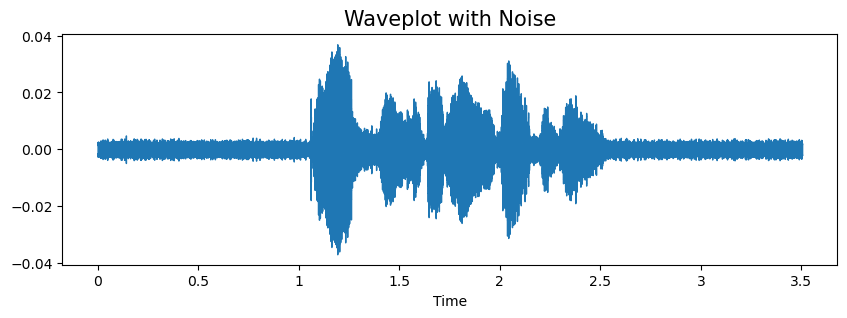

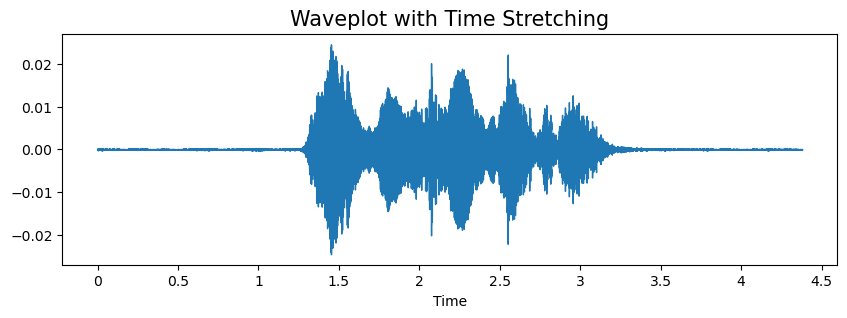

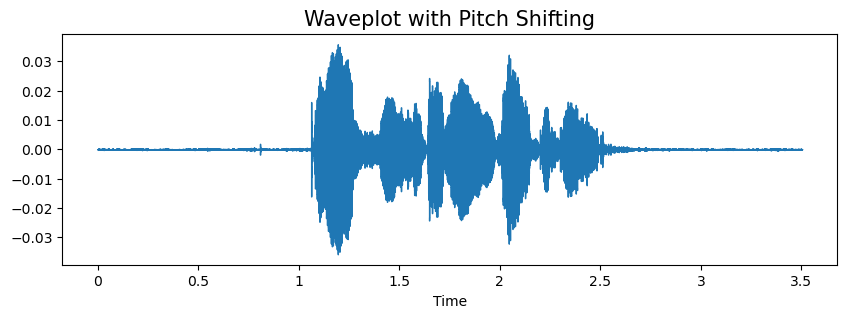

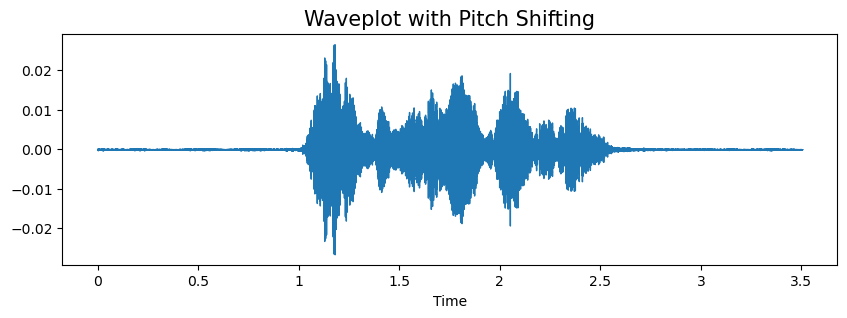

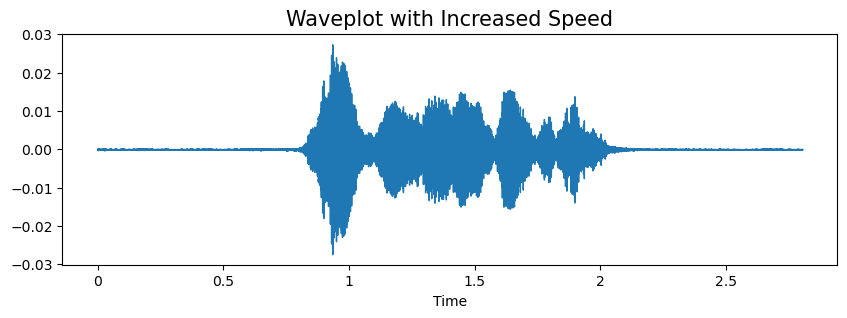

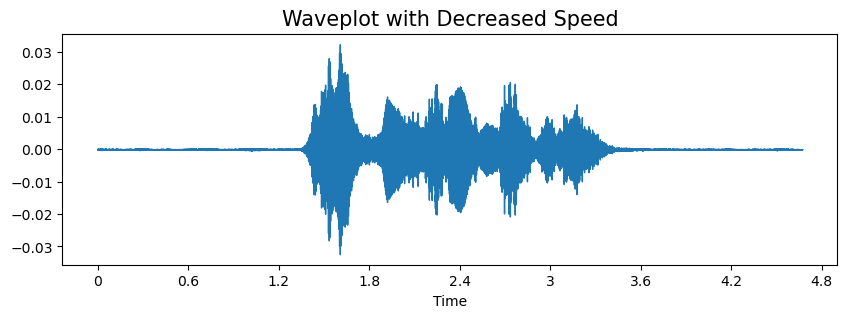

In [96]:
data, sample_rate = librosa.load(file_path)

# Noise
noisy_data = noise(data)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(noisy_data, sr=sample_rate)
plt.title('Waveplot with Noise', size=15)
plt.show()
Audio(noisy_data, rate=sample_rate)

# Stretch
def stretch(data, rate=None):
    if rate is None:
        rate = 0.8
    data = data.astype(np.float32)
    return librosa.effects.time_stretch(data, rate=rate)
speed_factor = 1.25  # or any other value you want to use
stretched_data = stretch(data)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(stretched_data, sr=sample_rate)
plt.title('Waveplot with Time Stretching', size=15)
plt.show()
Audio(stretched_data, rate=1.25)


# Shift
def shift(data, sample_rate):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)
shifted_data = shift(data, sample_rate)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(shifted_data, sr=sample_rate)
plt.title('Waveplot with Pitch Shifting', size=15)
plt.show()
Audio(shifted_data, rate=sample_rate)

# Pitch
def pitch(data, sample_rate, pitch_factor=0.7):
    data = data.astype(np.float32)
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=pitch_factor)

pitched_data = pitch(data, sample_rate, pitch_factor=0.7)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(pitched_data, sr=sample_rate)
plt.title('Waveplot with Pitch Shifting', size=15)
plt.show()
Audio(pitched_data, rate=sample_rate)

# Higher Speed
def higher_speed(data, speed_factor=1.25):
    data = data.astype(np.float32)
    return librosa.effects.time_stretch(data, rate=speed_factor)

faster_data = higher_speed(data)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(faster_data, sr=sample_rate)
plt.title('Waveplot with Increased Speed', size=15)
plt.show()
Audio(faster_data, rate=sample_rate)

# Lower Speed
slower_data = lower_speed(data)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(slower_data, sr=sample_rate)
plt.title('Waveplot with Decreased Speed', size=15)
plt.show()
Audio(slower_data, rate=sample_rate)

### Feature Exactuation 

In [98]:
import numpy as np
import librosa

def extract_features(data, sample_rate, n_mfcc=58):
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

In [100]:
def get_features(file_path, sample_rate):
    data, _ = librosa.load(file_path, sr=sample_rate, duration=3, offset=0.5)
    
    # Initialize result array with features from original data
    result = extract_features(data, sample_rate)
    
    # Apply augmentation and extract features
    augmentations = [
        noise(data),
        stretch(data),
        shift(data),
        pitch(data, sample_rate),
        higher_speed(data),
        lower_speed(data)
    ]
    
    for aug_data in augmentations:
        aug_features = extract_features(aug_data, sample_rate)
        result = np.vstack((result, aug_features))
    
    return result

In [102]:
import pandas as pd

# Define the sample rate for consistency
sample_rate = 22050

# Apply feature extraction to all audio samples
features = []

for index, row in df_combined.iterrows():
    file_path = row['File Path']
    emotion = row['Emotion']
    audio = row['Audio']
    
    print(f"Processing file: {file_path} with emotion {emotion}")
    try:
        feature = extract_features(audio, sample_rate)
        features.append([feature, emotion])
    except Exception as e:
        print(f"Error processing file: {file_path} with emotion {emotion}")
        print(f"Error: {e}")

# Convert the features to a DataFrame
df_features = pd.DataFrame(features, columns=['Features', 'Emotion'])

# Split features and labels for model training
X = np.array(df_features['Features'].tolist())
y = df_features['Emotion']

Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav with emotion angry
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav with emotion fearful
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav with emotion fearful
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-02-01-01-16.wav with emotion angry
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-01-01-01-16.wav with emotion disgust
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-01-01-02-16.wav with emotion sad
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-02-02-02-16.wav with emotion sad
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-02-02-01-16.wav with emotion disgust
Processing file: /Users/ireneliu/Des

## USING MFCC (Mel-Frequency Cepstral Coefficients)

In [104]:
import numpy as np
import pandas as pd
import librosa

def extract_features(data, sample_rate, n_mfcc=58):
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

def get_features(data, sample_rate):
    # Initialize result array with features from original data
    result = extract_features(data, sample_rate)
    result = result.reshape(1, -1)
    
    # Apply augmentation and extract features
    augmentations = [
        noise(data),
        stretch(data),
        shift(data, sample_rate),
        pitch(data, sample_rate),
        higher_speed(data),
        lower_speed(data)
    ]
    
    for aug_data in augmentations:
        aug_features = extract_features(aug_data, sample_rate)
        result = np.vstack((result, aug_features))
    
    return result

## Extracting Features From each audio [original & Augmented] and save them in CSV File

In [108]:
def extract_emotion_from_filename(file_name):
    # Example: '03-01-05-01-02-01-16.wav' where the 3rd part is the emotion code
    parts = file_name.split('-')
    emotion_code = parts[2]
    emotion_map = {
        '01': 'neutral',
        '02': 'calm',
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'
    }
    return emotion_map.get(emotion_code, 'unknown')

# Define paths and labels
file_paths = []  # List of file paths to your audio files
emotions = []    # Corresponding list of emotion labels

# Populate file_paths and emotions from your dataset directory

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_paths.append(os.path.join(root, file))
            # Extract the emotion label from the file name
            emotions.append(extract_emotion_from_filename(file))

# Extract features from each audio file
X, Y = [], []
sample_rate = 22050

for file_path, emotion in zip(file_paths, emotions):
    print(f"Processing file: {file_path}")
    data, sr = librosa.load(file_path, sr=sample_rate, duration=3, offset=0.5)
    features = get_features(data, sr)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

# Convert to DataFrame
features_df = pd.DataFrame(X)
features_df['label'] = Y

# Save to CSV
features_df.to_csv('audio_features.csv', index=False)

Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-05-02-01-01-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-01-01-01-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-01-01-02-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-04-02-02-02-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-07-02-02-01-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-08-02-02-01-16.wav
Processing file: /Users/ireneliu/Desktop/Audio_Speech_Actors_01-24/Actor_16/03-01-08-01-01-

## Splitting data into training & testing

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f'X_train: {len(X_train)}, X_test: {len(X_test)}')
print(f'y_train: {len(y_train)}, y_test: {len(y_test)}')

X_train: 8064, X_test: 2016
y_train: 8064, y_test: 2016


In [112]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Expand dimensions for CNN compatibility
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Output the shapes
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (8064, 58, 1), y_train shape: (8064, 8)
X_test shape: (2016, 58, 1), y_test shape: (2016, 8)


### MODEL

## Building the CNN-LSTM Model

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Assuming X_train.shape = (num_samples, num_timesteps, num_features)
input_shape = (X_train.shape[1], X_train.shape[2])  # num_timesteps, num_features

# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# LSTM layers
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(128))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer
num_classes = y_train.shape[1]
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 56, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 56, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 54, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 54, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 27, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 27, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 27, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 27, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,880 (1.46 MB)

 Trainable params: 383,624 (1.46 MB)

 Non-trainable params: 256 (1.00 KB)

In [116]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when a metric has stopped improving
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.4, verbose=1, patience=10, min_lr=0.000001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[rlrp], validation_data=(X_test, y_test))

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy:.2%}")
print(f"Testing Loss: {test_loss:.4f}")

Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1779 - loss: 2.0227 - val_accuracy: 0.1999 - val_loss: 1.9994 - learning_rate: 1.0000e-04
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.2852 - loss: 1.8507 - val_accuracy: 0.3269 - val_loss: 1.7808 - learning_rate: 1.0000e-04
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3208 - loss: 1.7764 - val_accuracy: 0.3562 - val_loss: 1.6700 - learning_rate: 1.0000e-04
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3624 - loss: 1.6811 - val_accuracy: 0.3914 - val_loss: 1.5716 - learning_rate: 1.0000e-04
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3864 - loss: 1.6322 - val_accuracy: 0.4350 - val_loss: 1.4817 - learning_rate: 1.0000e-04
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.4045 - loss: 1.5499 - val_accuracy: 0.4851 - val_loss: 1.4093 - learning_rate: 1.0000e-04
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/st

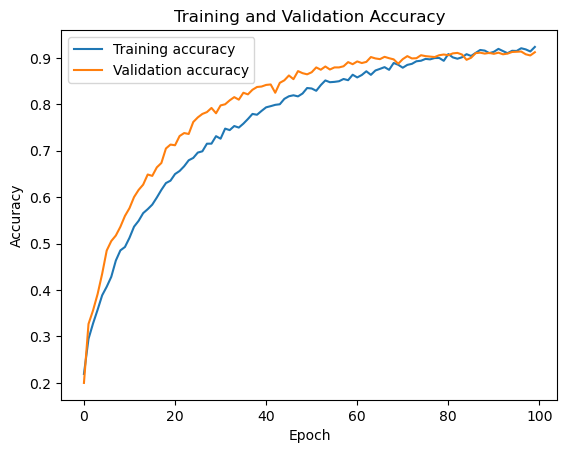

In [118]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from one-hot to class labels if necessary
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       268
           1       0.94      0.91      0.92       269
           2       0.89      0.90      0.89       269
           3       0.92      0.92      0.92       269
           4       0.89      0.92      0.91       269
           5       0.85      0.86      0.85       134
           6       0.93      0.90      0.92       269
           7       0.94      0.92      0.93       269

    accuracy                           0.91      2016
   macro avg       0.91      0.91      0.91      2016
weighted avg       0.91      0.91      0.91      2016



63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


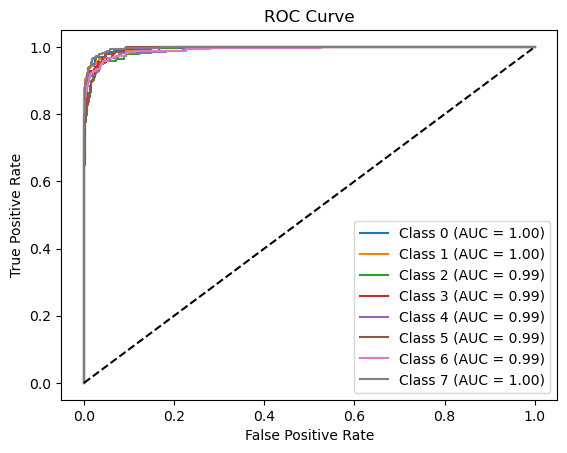

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


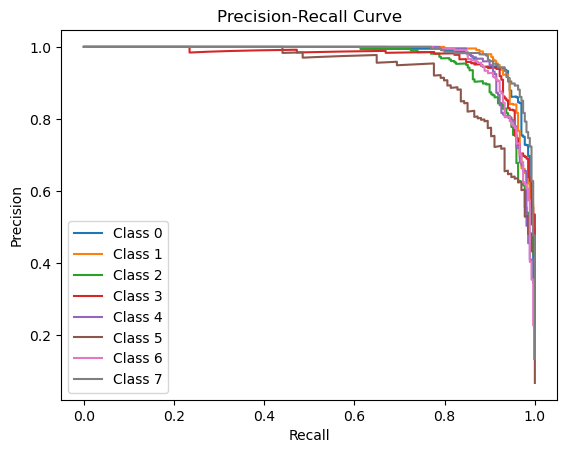

In [130]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall and plot curve for each class
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [132]:
from sklearn.metrics import f1_score

# Predict class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute F1 score for each class
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f'Weighted F1 Score: {f1:.2f}')

Weighted F1 Score: 0.91
